In [106]:
from Bio import SeqIO, Align
from os import listdir

import pandas as pd
import re
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl

In [52]:
spacer_file = pd.read_excel('./spacers.xlsx')
spacer_file['Spacer'] = spacer_file['Spacer'].apply(str.upper) 

name_dict = dict(zip(spacer_file['Spacer'], spacer_file['Name']))

fq_files = [name for name in listdir('./fastq/') if name.endswith('fastq')]

In [85]:
report_mat = pd.DataFrame(columns=list(spacer_file['Name']) + ['missing', 'unknown'], index=[name[0:4] for name in fq_files])
report_mat.fillna(0, inplace=True)

In [86]:
report_mat

,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,...,Y3,Y4,Y5,Z1,Z2,Z3,Z4,Z5,missing,unknown
A_01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B_02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C_03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
D_04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E_05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F_06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G_07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
H_08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
I_09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
J_10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
len(name_dict.keys())

130

In [67]:
len('GAAACAAATGTTTAAGCCACACTGTTGGAC')

30

In [113]:
spacer_re = re.compile(r'ACACC((A|C|T|G){28,32})GTTGT')

In [114]:
for file in fq_files:
    records = SeqIO.parse('./fastq/' + file, 'fastq')
    mat_idx = file[0:4]
    for record in records:
        sp_match_f = spacer_re.search(str(record.seq))
        if sp_match_f is None:
            sp_match_r = spacer_re.search(str(record.seq.reverse_complement()))
            if not (sp_match_r is None):
                spacer = sp_match_r.group(1)
            else:
                spacer = None
        else:
            spacer = sp_match_f.group(1)

        if spacer is None:
            mat_col = 'missing'
        else:
            mat_col = name_dict.get(spacer, 'unknown')

        report_mat.loc[mat_idx, mat_col] += 1

report_mat_frac = report_mat.div(report_mat.sum(axis=1), axis=0)

C:\Users\yitongma\AppData\Local\Temp\ipykernel_31508\2626006906.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c_cmap = mpl.cm.get_cmap("OrRd").copy()


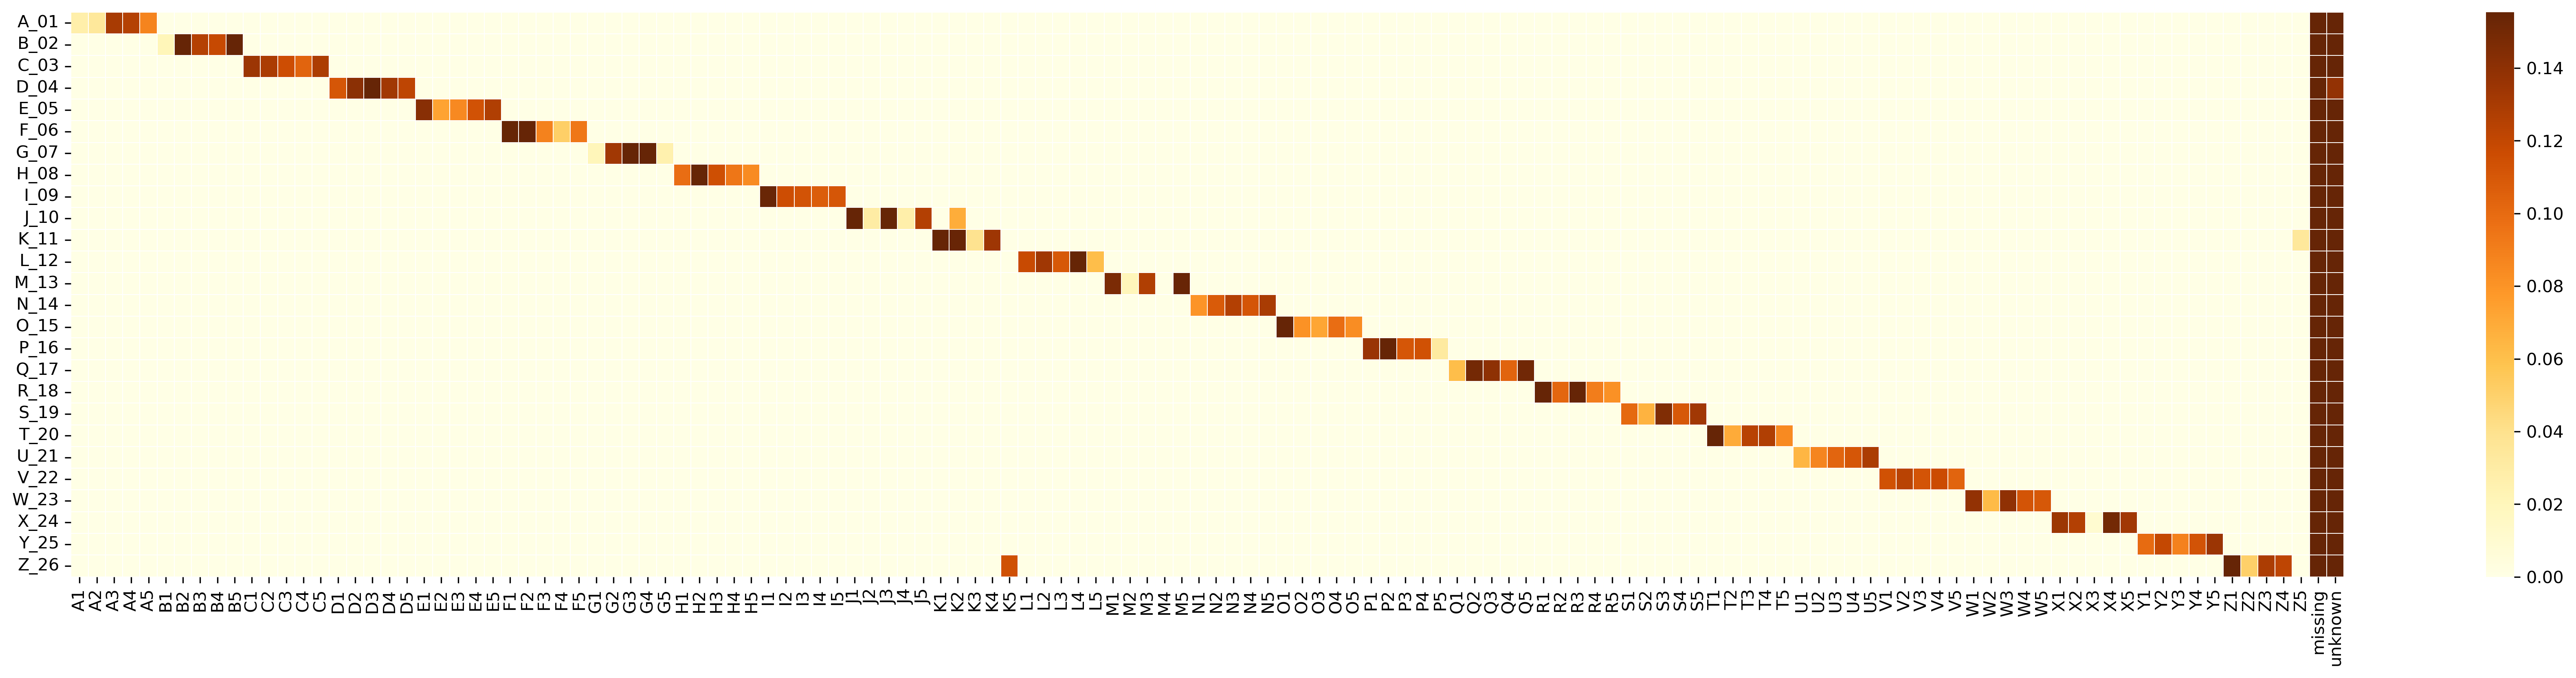

In [115]:
c_cmap = mpl.cm.get_cmap("OrRd").copy()
c_cmap.set_bad

fig, ax = plt.subplots(figsize=(30, 6))
fig.dpi = 300
sns.heatmap(report_mat_frac, xticklabels=True, yticklabels=True, cmap='YlOrBr', ax=ax, linewidths=0.1, robust=True)

fig.savefig('./report.png')

In [100]:
report_mat_frac.to_excel('./report.xlsx')

In [116]:
report_mat_frac

,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,...,Y3,Y4,Y5,Z1,Z2,Z3,Z4,Z5,missing,unknown
A_01,0.027451,0.034314,0.130392,0.125163,0.087908,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310458,0.284314
B_02,0.000000,0.000000,0.000000,0.000000,0.000000,0.021142,0.156448,0.12544,0.118393,0.164905,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190275,0.223397
C_03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.216982,0.172002
D_04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.189948,0.137835
E_05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.253894,0.204649
F_06,0.000000,0.000000,0.000362,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.213184,0.198482
G_07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.189913,0.160580
H_08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.236602,0.212161
I_09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.217860,0.181955
J_10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.247999,0.178675


In [50]:
aa = spacer_re.search('GAAACACCGAAAGAAGTAAGTAGTGTACTCTGCTGTCAGTTGTGG')
aa.group(1)

'GAAAGAAGTAAGTAGTGTACTCTGCTGTCA'

In [43]:
test_re = re.compile(r'GAAACACC(A|T|C|G){29,31}GTTGTGG')
test_re.search('GGAGAAACACCAAAGAGAAGTAAGTAGTGTACTCTGCTGTCAGTTGTGGTTA')

<re.Match object; span=(3, 49), match='GAAACACCAAAGAGAAGTAAGTAGTGTACTCTGCTGTCAGTTGTGG'>

In [51]:
fq_files

['A_01.fastq',
 'B_02.fastq',
 'C_03.fastq',
 'D_04.fastq',
 'E_05.fastq',
 'F_06.fastq',
 'G_07.fastq',
 'H_08.fastq',
 'I_09.fastq',
 'J_10.fastq',
 'K_11.fastq',
 'L_12.fastq',
 'M_13.fastq',
 'N_14.fastq',
 'O_15.fastq',
 'P_16.fastq',
 'Q_17.fastq',
 'R_18.fastq',
 'S_19.fastq',
 'T_20.fastq',
 'U_21.fastq',
 'V_22.fastq',
 'W_23.fastq',
 'X_24.fastq',
 'Y_25.fastq',
 'Z_26.fastq']